In [1]:
import sklearn
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt

In [5]:
#read the data
data_exams = pd.read_csv("PassFail.csv")

In [7]:
data_exams.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [9]:
data_exams.head()

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [11]:
data_exams.describe()

,Hours,Pass
count,20.000000,20.000000
mean,2.787500,0.550000
std,1.507165,0.510418
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,1.000000
75%,4.062500,1.000000
max,5.500000,1.000000


In [37]:
formula = 'Pass ~ Hours'
model = smf.glm(formula=formula, data=data_exams, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Pass   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.1506
Date:                Sat, 17 May 2025   Deviance:                       16.301
Time:                        11:07:57   Pearson chi2:                     15.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4295
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6736      1.666     -2.204      0.027      -6.940      -0.407
Hours          1.4985      0.640      2.341      0.019       0.244       2.753
==============================================================================
"""

In [39]:
probabilities = result.predict(data_exams['Hours'])

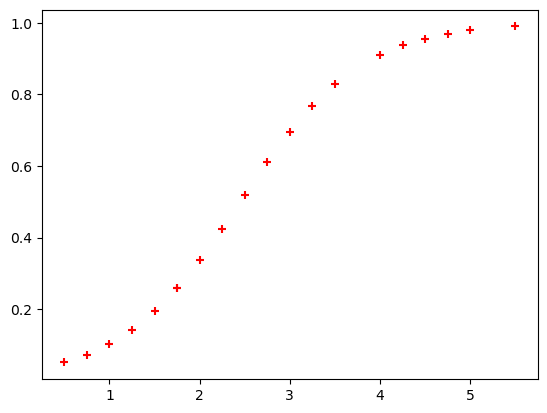

In [41]:
plt.scatter(data_exams['Hours'],probabilities,marker='+',color='red')

In [43]:
# what is the probability of passing with 2 hours of study ?
Hours = [2]
x = pd.DataFrame(Hours, columns = ['Hours'])
pass_pred = result.predict(x)
pass_pred

0    0.337028
dtype: float64

In [45]:
# students who have studied 7 hours and 3 hours
Hours = [7, 3]
x = pd.DataFrame(Hours, columns = ['Hours'])
pass_pred = result.predict(x)
pass_pred

0    0.998905
1    0.694651
dtype: float64

In [47]:
# Usually the threshold that is used is 0.5
# The in-sample predictions
classes = np.where( probabilities > 0.5, 1, 0 )
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
# Out of sample predictions
Hours = [7, 3]
x = pd.DataFrame(Hours, columns = ['Hours'])
pass_pred = result.predict(x)
cls = np.where( pass_pred > 0.5, 1, 0 )
cls


array([1, 1])

In [51]:
logreg = LogisticRegression()
logreg.fit(data_exams[['Hours']], data_exams.Pass)

LogisticRegression()

In [53]:
y_pred = logreg.predict(data_exams[['Hours']])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [55]:
# confusion matrix
cnf_matrix = metrics.confusion_matrix(data_exams.Pass, y_pred)
cnf_matrix

array([[7, 2],
       [2, 9]], dtype=int64)

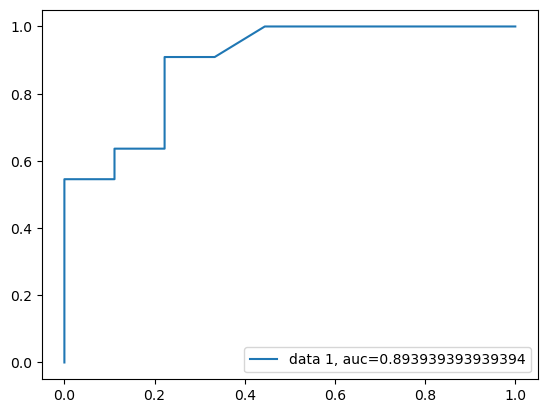

In [57]:
# ROC curve
y_pred_proba = logreg.predict_proba(data_exams[['Hours']])[::,1]
fpr, tpr, _ = metrics.roc_curve(data_exams.Pass,  y_pred_proba)
auc = metrics.roc_auc_score(data_exams.Pass, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()